

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tail Length (cm)  342 non-null    float64
 1   Mass (kg)         342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB
     Tail Length (cm)  Mass (kg)
0                18.1      3.750
1                18.6      3.800
2                19.5      3.250
3                19.3      3.450
4                19.0      3.650
..                ...        ...
337              20.7      4.000
338              20.2      3.400
339              19.3      3.775
340              21.0      4.100
341              19.8      3.775

[342 rows x 2 columns]
   Mass (kg)  Tail Length (cm)
0       3.75              18.1
1       3.80              18.6
2       3.25              19.5
3       3.45              19.3
4       3.65              19.0




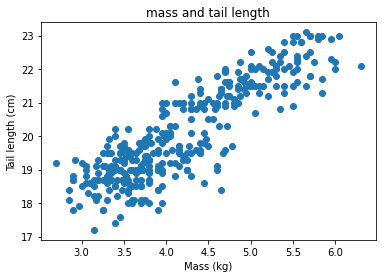



data 342
train 273
test 69
slope 1.5918366380922186
intercept 13.346572891893366
slope [[1.59183664]]
intercept [13.34657289]


line on actual data


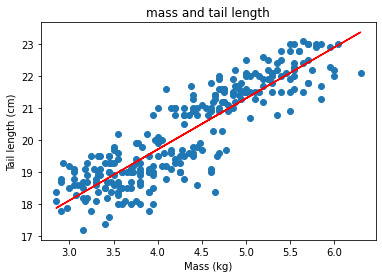



 line on training data 


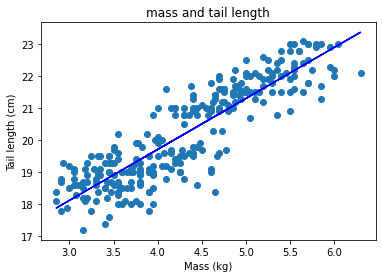



 plotting test data with regression line


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


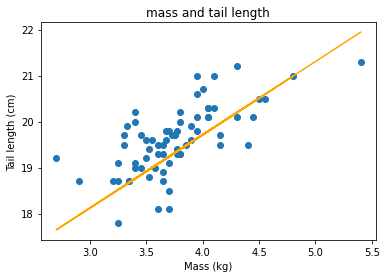

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"




   actual  predicted
0    18.1   19.31596
1    18.6   19.31596
2    19.5   19.31596
3    19.3   19.31596
4    19.0   19.31596


bar graph for comparison


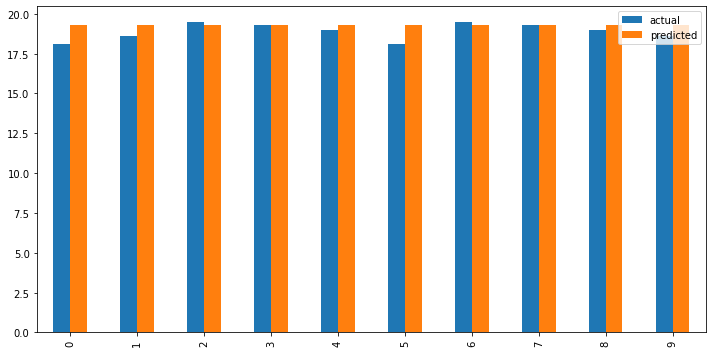

residual sum of squares: 27.909091380645208


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df=pd.read_csv("/content/CatData.csv")

#data preprocessing
df.columns
print("\n")
df.info()

#removing null values
df.dropna(inplace = True)
print(df)

df=df[["Mass (kg)","Tail Length (cm)"]]
print(df.head( ))

print("\n")
#scatter ploting
plt.scatter(df["Mass (kg)"],df["Tail Length (cm)"])
plt.title("mass and tail length")
plt.xlabel("Mass (kg)")
plt.ylabel("Tail length (cm)")
plt.show()

print("\n")
#splitting data
n=int(len(df)*0.8)
#training data
train=df[:n]
#testing data
test=df[n:]

print("data",len(df))
print("train",len(train))
print("test",len(test))

#finding slope and intercept
def simple_linear_regression(input_feature,output):
  xi=input_feature
  yi=output
  
  n=len(xi)
  xi_mean=xi.mean()
  yi_mean=yi.mean()
  sxi=(xi).sum()
  syi=(yi).sum()

  sxiyi= ((xi*yi).sum())*n
  sxi_syi= sxi*syi

  sxixi=((xi*xi).sum())*n
  sxisquare=sxi*sxi

  slope=(sxiyi-sxi_syi)/(sxixi-sxisquare)
  intercept=yi_mean-slope*xi_mean

  return slope,intercept

actual_slope,actual_intercept= simple_linear_regression(train["Mass (kg)"],train["Tail Length (cm)"])

print("slope",actual_slope)
print("intercept",actual_intercept)


#training the model
regr=linear_model.LinearRegression()
train_x=np.array(train[["Mass (kg)"]])
train_y=np.array(train[["Tail Length (cm)"]])

regr.fit(train_x,train_y)

coefficients=regr.coef_
intercept=regr.intercept_
#slope and intercept
print("slope",coefficients)
print("intercept",intercept)



#plotting with actual data
print("\n")
#scatter with line on original data ploting
print("line on actual data")
plt.scatter(train["Mass (kg)"],train["Tail Length (cm)"])
plt.plot(train["Mass (kg)"],actual_slope*train["Mass (kg)"]+actual_intercept,color="red")
plt.title("mass and tail length")
plt.xlabel("Mass (kg)")
plt.ylabel("Tail length (cm)")
plt.show()
print("\n")
#ploting with training data
print(" line on training data ")
plt.scatter(train["Mass (kg)"],train["Tail Length (cm)"])
plt.plot(train_x,coefficients[0]*train_x+intercept,color="blue")
plt.title("mass and tail length")
plt.xlabel("Mass (kg)")
plt.ylabel("Tail length (cm)")
plt.show()


#prediction for test data set
predicted_test=regr.predict(test[["Mass (kg)"]])
predicted_test[0:5]
print("\n")
#plotting test data with regression line
print(" plotting test data with regression line")
plt.scatter(test["Mass (kg)"],test["Tail Length (cm)"])
plt.plot(test["Mass (kg)"],predicted_test,color="orange")
plt.title("mass and tail length")
plt.xlabel("Mass (kg)")
plt.ylabel("Tail length (cm)")
plt.show()


#prediction for complete data set
predicted_data=regr.predict(df[["Mass (kg)"]])
predicted_data[0:5]
print("\n")
#actual vs predicted
a_p_data = pd.DataFrame({"actual":df["Tail Length (cm)"],"predicted":predicted_data[:][0][0]})
print(a_p_data.head())
#bar graph for comparison
print("\n")
print("bar graph for comparison")
a_p_data.head(10).plot(kind='bar',figsize=(12,6))
plt.show()


#error calculation
test_x=np.array(test[['Mass (kg)']])
test_y=np.array(test[['Tail Length (cm)']])

predicted_y=regr.predict(test_x)

res=(predicted_y-test_y)
RSS=(res*res).sum()

print("residual sum of squares:",RSS)














